In [100]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<h2>데이터 셋 불러오기</h2>

In [103]:
df = pd.read_csv("C:/resources/DeepLearning/diabetes.csv",  engine ="python")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [105]:
#PCA를 적용할 데이터와 레이어를 분리
df_data = df.drop('Outcome', axis = 1)
df_outcome = df['Outcome']

In [107]:
df_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [109]:
df_outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [111]:
#데이터 스케일링
scaler = StandardScaler()
df_data_scaled = scaler.fit_transform(df_data)
df_data_scaled

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

<h2>데이터에 PCA적용(3개의 주성분으로 축소)</h2>

In [114]:
pca = PCA(n_components = 3)
df_data_pca = pca.fit_transform(df_data_scaled)
df_data_pca

array([[ 1.06850273,  1.23489499, -0.09592984],
       [-1.12168331, -0.73385167,  0.71293816],
       [-0.39647671,  1.59587594, -1.76067844],
       ...,
       [-0.28347525,  0.09706503,  0.07719194],
       [-1.06032431,  0.83706234, -0.42503045],
       [-0.83989172, -1.15175485,  1.00917817]])

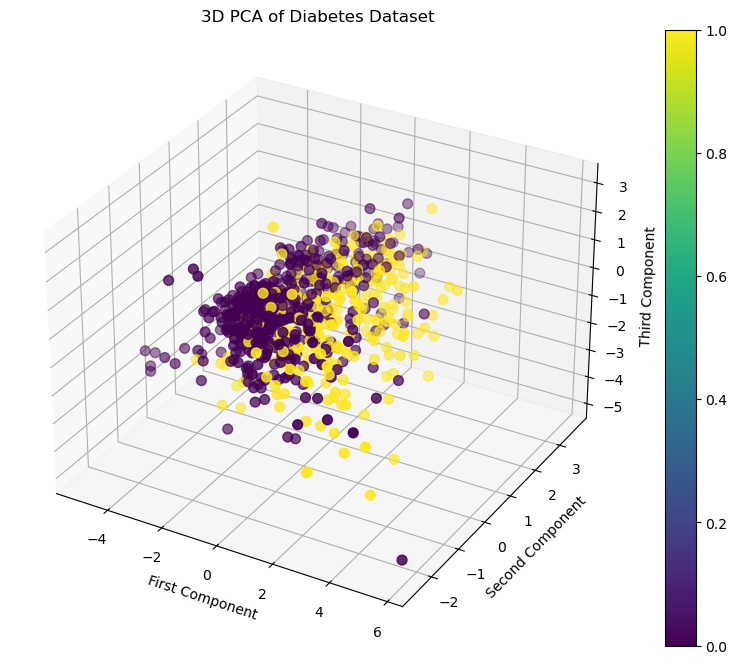

In [120]:
#2개는 뭔가 심심해서 3개로 축소한 다음 산점도를 그려 보았다

from mpl_toolkits.mplot3d import Axes3D
#3D 산점도
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_data_pca[:, 0], df_data_pca[:, 1], df_data_pca[:, 2], c=df_outcome, cmap='viridis', s=50)

ax.set_xlabel('First Component')
ax.set_ylabel('Second Component')
ax.set_zlabel('Third Component')

plt.colorbar(scatter)
plt.title('3D PCA of Diabetes Dataset')
plt.show()

In [122]:
df_outcome.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [124]:
#원-핫 인코딩
Y = pd.get_dummies(df_outcome).values

In [126]:
from sklearn.model_selection import train_test_split

#학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(df_data_pca, Y, test_size=0.2,random_state=0)

X_train

array([[ 1.76561556,  1.49649191, -0.450222  ],
       [-1.12152016, -0.60124779,  0.30405143],
       [ 4.351419  , -2.59005928, -0.59439547],
       ...,
       [-1.55166702, -0.4484309 ,  0.70309523],
       [-1.16500514,  1.89460192,  0.74277548],
       [-1.49330803,  3.24612748, -1.85087524]])

In [128]:
y_test.shape

(154, 2)

<h2>모델 생성</h2>

In [131]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
#순차구조 모델
model = Sequential()

#첫 번째 레이어에선 input_shape 추가 지정
model.add(Dense(15, input_shape=(X_train.shape[1], ), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(2, activation='sigmoid')) #출력 유닛 수는 레이블 수와 같아야 한다

model.compile(optimizer=Adam(learning_rate=0.02), loss='bce', metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 15)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300 (1.17 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
#모델 학습
model_history=model.fit(x=X_train, y=y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1) #arg: 배열에서 최댓값을 가지는 원소의 인덱스를 반환하는 함수
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5869 - loss: 0.6831 - val_accuracy: 0.7338 - val_loss: 0.6134
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7434 - loss: 0.6160 - val_accuracy: 0.7468 - val_loss: 0.5720
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7414 - loss: 0.5914 - val_accuracy: 0.7468 - val_loss: 0.5471
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7285 - loss: 0.5797 - val_accuracy: 0.7468 - val_loss: 0.5558
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7518 - loss: 0.5762 - val_accuracy: 0.7532 - val_loss: 0.5317
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6868 - loss: 0.6018 - val_accuracy: 0.7597 - val_loss: 0.5172
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.5553 - val_accuracy: 0.7597 - val_loss: 0.5187
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7426 - loss: 0.5672 - val_accuracy: 0.7532 - val_loss

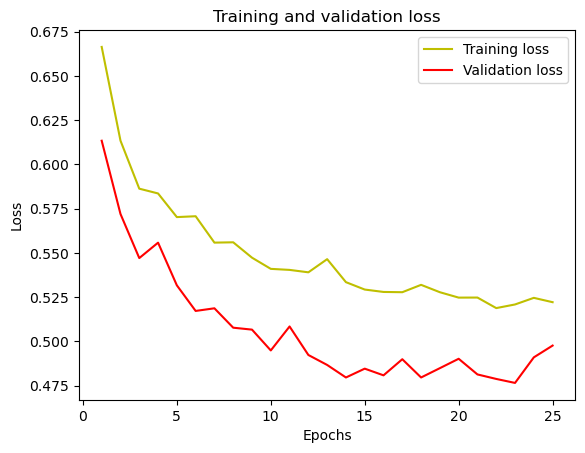

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# 훈련 손실(training loss)과 검증 손실(validation loss) 추출
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

# 에포크(epoch) 범위 생성
epochs = range(1, len(loss) + 1)

# 훈련 손실(training loss)과 검증 손실(validation loss) 시각화
plt.plot(epochs, loss, 'y', label='Training loss')  # 훈련 손실을 노란색(yellow)으로 플롯
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # 검증 손실을 빨간색(red)으로 플롯
plt.title('Training and validation loss')  # 그래프 제목 설정
plt.xlabel('Epochs')  # x축 레이블 설정
plt.ylabel('Loss')  # y축 레이블 설정
plt.legend()  # 범례(legend) 표시
plt.show()  # 그래프 출력

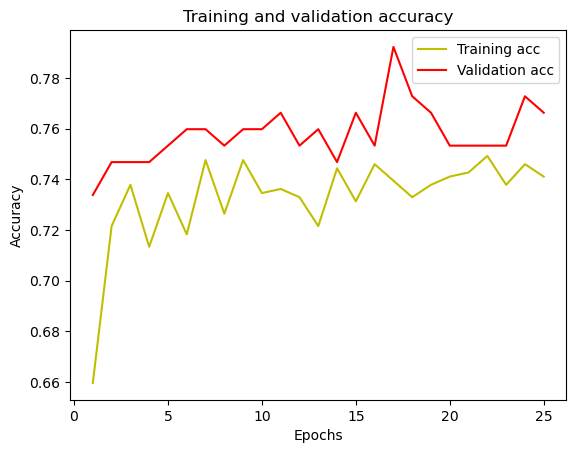

In [137]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [139]:
#예측값의 정확도 확인
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       107
           1       0.62      0.62      0.62        47

    accuracy                           0.77       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.77      0.77      0.77       154

[[89 18]
 [18 29]]
